The task is to explore the translation pipeline in Transformers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.tokenize import RegexpTokenizer
from transformers import pipeline

In [2]:
# download the dataset: English-Spanish translations from Tatoeba
!wget -nc https://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip

File ‘spa-eng.zip’ already there; not retrieving.



In [3]:
#!unzip spa-eng.zip

In [4]:
# compile English-Spanish translations
en2es = {}
for line in open('spa-eng/spa.txt'):
    line = line.rstrip()
    en, es = line.split('\t')
    if en not in en2es:
        en2es[en] = []
    en2es[en].append(es)

In [5]:
tokenizer = RegexpTokenizer(r'\w+')

In [6]:
# tokenize translations
en2es_tokens = {}
for en, es_list in en2es.items():
    es_list_tokens = []
    for text in es_list:
        tokens = tokenizer.tokenize(text.lower())
        es_list_tokens.append(tokens)
    en2es_tokens[en] = es_list_tokens

In [7]:
# load the pipeline
translator = pipeline('translation', model='Helsinki-NLP/opus-mt-en-es')

In [8]:
translator("I'm interested in machine learning")

[{'translation_text': 'Estoy interesado en el aprendizaje automático.'}]

In [9]:
translator('The melancholy waters lie.')

[{'translation_text': 'Las aguas melancólicas yacen.'}]

In [10]:
# get 500 random English phrases from the dataset
en_phrases_set = list(np.random.choice(list(en2es.keys()), 500))

In [11]:
# use the pipeline to get translations
translations = translator(en_phrases_set)

In [12]:
translations

[{'translation_text': 'Los registros de nacimiento de Tom están sellados.'},
 {'translation_text': 'No nos subestimes.'},
 {'translation_text': 'Tenemos algunos rosales en frente de nuestra casa.'},
 {'translation_text': 'No podía hacer nada.'},
 {'translation_text': 'Tom no hizo lo que se suponía que debía hacer.'},
 {'translation_text': 'Se está estudiando un nuevo tratamiento para la hepatitis.'},
 {'translation_text': 'Esto es para ti, Tom.'},
 {'translation_text': 'El policía lo cogió por el brazo.'},
 {'translation_text': 'Deberías prepararte para el futuro.'},
 {'translation_text': 'Anoche tuve un leve dolor de cabeza.'},
 {'translation_text': 'Su padre es taxista.'},
 {'translation_text': 'Besó a su hija en la frente.'},
 {'translation_text': 'Lleva un diario.'},
 {'translation_text': 'Ustedes son nuevos estudiantes.'},
 {'translation_text': 'Me duelen los ojos.'},
 {'translation_text': 'Se resfría muy fácilmente.'},
 {'translation_text': 'Vimos otro barco muy adelante.'},
 {'t

In [13]:
smoother = SmoothingFunction()

In [14]:
# calculate BLEU scores
scores = []
for en, pred in zip(en_phrases_set, translations):
    matches = en2es_tokens[en]
    es_pred = tokenizer.tokenize(pred['translation_text'].lower())
    score = sentence_bleu(matches, es_pred, smoothing_function=smoother.method4)
    scores.append(score)

(array([  3.,   0.,   4.,   1.,   3.,   0.,   1.,   8.,   4.,  14.,  14.,
         17.,  18.,  25.,  21.,  20.,  25.,   7.,   7.,   9.,   5.,  20.,
         10.,   8.,   3.,   6.,   7.,   6.,   1.,   3.,  35.,   2.,   8.,
         11.,   1.,   6.,   4.,  11.,   9.,   0.,   5.,   0.,   4.,   4.,
          3.,   0.,   0.,   0.,   0., 127.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

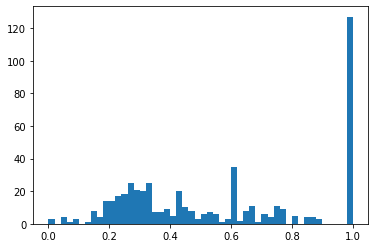

In [15]:
# show scores distribution
plt.hist(scores, bins=50)

In [16]:
def print_random_translation():
    i = np.random.choice(len(en_phrases_set))
    en = en_phrases_set[i]
    print('EN:', en)
    translation = translations[i]['translation_text']
    print('ES:', translation)
    matches = en2es[en]
    print('Matches:', matches)

In [17]:
print_random_translation()

EN: I knew you were OK.
ES: Sabía que estabas bien.
Matches: ['Sabía que estabas bien.']


In [18]:
print_random_translation()

EN: Is this store open on Sundays?
ES: ¿Esta tienda está abierta los domingos?
Matches: ['¿Esta tienda abre los domingos?']


In [19]:
print_random_translation()

EN: Hey, be careful with that!
ES: ¡Ten cuidado con eso!
Matches: ['Hey, ten cuidado con eso.', 'Hey, tenga cuidado con eso.', 'Hey, tengan cuidado con eso.']
